Drawing 3D histogram and 3D surface for RSS

In [0]:
import plotly.graph_objects as go
import pandas as pd
#get necessary library
import datetime
from plotly import tools
import time
import seaborn as sns
import os
import plotly.express as px
from plotly.subplots import make_subplots
from google.colab import drive


import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
#mount google drive as a local hard
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
main_dir = '/content/gdrive/My Drive/australia_phd/phd_data/'
#rss_path_all = '/content/gdrive/My Drive/Colab Notebooks/gen_data_set/allData_device_before_3Aug.csv'
blocks_start = 'all_dataset_out_copy.csv'
#st_name_id = {2:'hassan'}
#1:'azifa',2:'hassan', 3:'ibrahim', 4:'mahmoud'}

In [0]:
def load_data_set(path):
  data_set = pd.read_csv(path)
  return data_set
tmp_table = load_data_set(main_dir+blocks_start)
tmp_table['x'] = tmp_table['x'].astype(int) + 1
tmp_table['y'] = tmp_table['y'].astype(int) + 1
tmp_table['user'] = tmp_table['user'].astype(int)

**Categorisation of the data based on the user. same datastructure is there (all AP, date and x, y)**

In [0]:
def load_users(tmp_table):
  user_1 = tmp_table[tmp_table['user']==1]
  user_2 = tmp_table[tmp_table['user']==2]
  user_3 = tmp_table[tmp_table['user']==3]
  user_4 = tmp_table[tmp_table['user']==4]
  return user_1, user_2, user_3, user_4
user_1, user_2, user_3, user_4 = load_users(tmp_table)

In [62]:
print(user_1.head());
print(user_2.head());
print(user_3.head());
print(user_4.head());
user_4.columns

      11     12     13     15     17  ...      9               date  x  y  user
0  -80.0  -79.0 -100.0 -100.0  -63.0  ...  -85.0  2019-09-25-184140  1  1     1
1  -80.0  -79.0 -100.0 -100.0  -63.0  ...  -85.0  2019-09-25-184142  1  1     1
2  -83.0  -83.0 -100.0 -100.0 -100.0  ...  -86.0  2019-09-25-184152  1  1     1
3 -100.0 -100.0 -100.0 -100.0  -71.0  ... -100.0  2019-09-25-184159  1  1     1
4  -84.0  -80.0  -86.0 -100.0  -68.0  ...  -88.0  2019-09-25-184209  1  2     1

[5 rows x 24 columns]
       11    12     13     15    17  ...     9               date  x  y  user
132 -80.0 -69.0 -100.0 -100.0 -67.0  ... -79.0  2019-09-25-183754  1  1     2
133 -81.0 -75.0  -77.0 -100.0 -67.0  ... -84.0  2019-09-25-183804  1  1     2
134 -84.0 -77.0 -100.0 -100.0 -69.0  ... -81.0  2019-09-25-183812  1  1     2
135 -73.0 -75.0  -74.0 -100.0 -59.0  ... -81.0  2019-09-25-183828  1  1     2
136 -77.0 -68.0  -82.0 -100.0 -52.0  ... -77.0  2019-09-25-183903  1  2     2

[5 rows x 24 columns]
      

Index(['11', '12', '13', '15', '17', '18', '19', '10', '21', '22', '3', '33',
       '37', '38', '39', '4', '6', '7', '8', '9', 'date', 'x', 'y', 'user'],
      dtype='object')

**Counting number of covered blocks per row**

In [0]:
!ls -l /content/gdrive/My\ Drive/australia_phd/phd_data/images/simple1 | wc -l

ls: cannot access '/content/gdrive/My Drive/australia_phd/phd_data/images/simple1': No such file or directory
0


In [63]:
no_rec_per_row = pd.pivot_table(tmp_table,index=["x"],values=["y"],aggfunc='count')
no_rec_per_row['x'] = no_rec_per_row.index
no_rec_per_row['y'] = no_rec_per_row['y']/(16)
no_rec_per_row['ref'] = 33
print(no_rec_per_row)

       y   x  ref
x                
1   33.0   1   33
2   33.0   2   33
3   33.0   3   33
4   33.0   4   33
5   33.0   5   33
6   33.0   6   33
7   33.0   7   33
8   32.0   8   33
9   32.0   9   33
10  33.0  10   33
11  33.0  11   33
12  33.0  12   33
13  32.0  13   33
14  33.0  14   33
15  32.0  15   33
16  32.0  16   33
17  31.0  17   33
18  31.0  18   33
19  32.0  19   33
20  33.0  20   33
21  33.0  21   33
22  31.0  22   33
23  31.0  23   33
24  29.0  24   33
25  30.0  25   33
26  33.0  26   33
27  33.0  27   33
28  33.0  28   33
29  33.0  29   33
30  33.0  30   33
31  33.0  31   33


**data_x_y_dup is the basic dataset with duplicate x and y**

In [0]:
date_x_y_dup = tmp_table.copy()
date_x_y_dup['x_1'] = tmp_table['x']
date_x_y_dup['y_1'] = tmp_table['y']


**pivot table creator**

In [65]:
def pivot_table_create(data_x_y_dup, filtered_col, index_col, columns_col, values_col, aggfun):
  no_rec_per_x_y = pd.pivot_table(date_x_y_dup[filtered_col],index=index_col,columns=columns_col,values=values_col, aggfunc=aggfun)
  #no_rec_per_x_y = no_rec_per_x_y.fillna(0)
  return no_rec_per_x_y
#print(no_rec_per_x_y.columns)
number_read_matrix = pivot_table_create(date_x_y_dup,["x","y","y_1"], ["x"], ["y"] , 'y_1', 'count')
print(number_read_matrix)
#number_read_matrix.plot()

y     1     2     3     4     5     6   ...    28    29    30    31    32    33
x                                       ...                                    
1   16.0  16.0  16.0  16.0  16.0  16.0  ...  16.0  16.0  16.0  16.0  16.0  16.0
2   16.0  16.0  16.0  16.0  16.0  16.0  ...  16.0  16.0  16.0  16.0  16.0  16.0
3   16.0  16.0  16.0  16.0  16.0  16.0  ...  16.0  16.0  16.0  16.0  16.0  16.0
4   16.0  16.0  16.0  16.0  16.0  16.0  ...  16.0  16.0  16.0  16.0  16.0  16.0
5   16.0  16.0  16.0  16.0  16.0  16.0  ...  16.0  16.0  16.0  16.0  16.0  16.0
6   16.0  16.0  16.0  16.0  16.0  16.0  ...  16.0  16.0  16.0  16.0  16.0  16.0
7   16.0  16.0  16.0  16.0  16.0  16.0  ...  16.0  16.0  16.0  16.0  16.0  16.0
8   16.0  16.0  16.0  16.0  16.0  16.0  ...  16.0  16.0  16.0  16.0  16.0  16.0
9   16.0  16.0  16.0  16.0  16.0  16.0  ...  16.0  16.0  16.0  16.0   NaN  16.0
10  16.0  16.0  16.0  16.0  16.0  16.0  ...  16.0  16.0  16.0  16.0  16.0  16.0
11  16.0  16.0  16.0  16.0  16.0  16.0  

In [66]:
def group_by_col(data_x_y_dup):
  #print(data_x_y_dup[filtered_col].groupby(['x']).count())
  #return
  data_x_y_dup['xy'] = data_x_y_dup['x'].astype(str) + data_x_y_dup['y'].astype(str)
  no_rec_per_x_y = date_x_y_dup.groupby(['x','y']).count()
  no_rec_per_x_y.reset_index(inplace=True)
  no_rec_per_x_y = no_rec_per_x_y.fillna(0)
  #print(no_rec_per_x_y[no_rec_per_x_y['xy']< 16])
  return no_rec_per_x_y
x_y_values=group_by_col(date_x_y_dup)
x_y_values = x_y_values[['x','y', 'xy']]
print(x_y_values)

       x   y  xy
0      1   1  16
1      1   2  16
2      1   3  16
3      1   4  16
4      1   5  16
...   ..  ..  ..
997   31  29  16
998   31  30  16
999   31  31  16
1000  31  32  16
1001  31  33  16

[1002 rows x 3 columns]


Diagram shows the blocks covered

In [67]:
import plotly.graph_objects as go

# Generate example data
import numpy as np
np.random.seed(1)

x = x_y_values['y'].values
y = x_y_values['x'].values
z = x_y_values['xy'].values

# Build figure
#fig = go.Figure()


fig = go.Figure(data=go.Heatmap(
    x = x, y = y, z = z, xgap = 1,
        ygap = 1,
    #colorbar=dict(
        #titleside="top",
        #tickmode="array",
        #tickvals=x,
       # ticks="outside"
       # )
       )
    )
#fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='black')
#fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='black')
#fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
#fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

fig.update_layout(
    #xaxis_nticks=33, yaxis_nticks=31,   
    #nticks=33,
    #yaxis=dict(
    #tickmode='linear'), # ===========
    #xaxis=dict(
    #tickmode='linear'),  
    width=700, height=800) 

fig.update_yaxes(dtick=1)
fig.update_xaxes(dtick=1)
fig.show()
# Add scatter trace with medium sized markers
#fig.add_trace(
#    go.heatmap(
#       number_read_matrix.values
#    )
#)

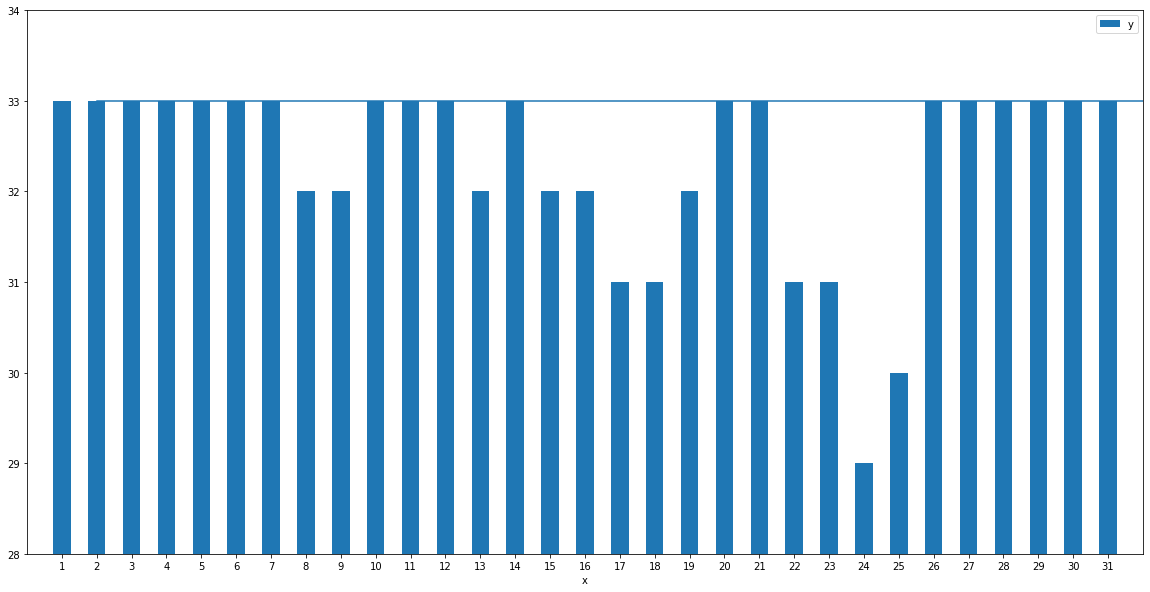

In [68]:
def draw_bar(df, xCol='x', yCol='y', ref='ref'):
  #df.plot(figsize=(5,5));
  ax = df.plot.bar(x=xCol, y=yCol, figsize=(20,10))
  #df.plot.line([])
  df['ref'].plot.line()
  ax.set_ylim(28,34)
  ax.set_xlim(-1,31)
  return
draw_bar(no_rec_per_row)

# Drawing service diagram

In [0]:
def draw_ser(df, ztitle = 'RSS', title='title'):
  #print(df)
  fig = go.Figure(data=[go.Surface(z=df)])
  fig.update_layout(title=title,scene = dict(xaxis_title='Y',yaxis_title='X',zaxis_title=ztitle),width=700, height=800)
  fig.update_yaxes(dtick=1)
  fig.update_xaxes(dtick=1)
  #fig.update_layout(title='Mt Bruno Elevation', autosize=False,width=500, height=500,margin=dict(l=65, r=50, b=65, t=90))
  fig.show()
#draw_ser(x_y_values)

In [0]:
def draw_heatmap(df, ztitle = 'RSS', title='title'):
  #print(df)
  #return
  #fig = go.Figure(data=go.Heatmap(
  #                 z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
  #                 x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
  #                 y=['Morning', 'Afternoon', 'Evening']))
  fig = go.Figure(data=[go.Heatmap(z=df.values)])
  fig.update_layout(title=title,scene = dict(xaxis_title='Y',yaxis_title='X',zaxis_title=ztitle),width=700, height=800)
  fig.update_yaxes(dtick=1)
  fig.update_xaxes(dtick=1)
  #fig.update_layout(title='Mt Bruno Elevation', autosize=False,width=500, height=500,margin=dict(l=65, r=50, b=65, t=90))
  fig.show()
#draw_heatmap(datafram)

In [0]:
def draw_boxplot(df,compare=True,columnz = False):
  if(compare):
    if(columnz == False):
      boxplot1 = df.boxplot(column=['11', '12', '13', '15', '17','18', '19', '10', '21', '22', '3', '33','37', '38', '39','4', '6', '7', '8', '9'],by='user', grid=False,layout=(4, 5),figsize=(30,10) )
    else:
      boxplot1 = df.boxplot(column=['11 ', '12 ', '13 ', '15 ', '17 ','18 ', '19 ', '10 ', '21 ', '22 ', '3 ', '33 ','37 ', '38 ', '39 ','4 ', '6 ', '7 ', '8 ', '9 '],by='user', grid=False,layout=(4, 5),figsize=(30,10) )  
  else:
    if(columnz == False):
      boxplot1 = df.boxplot(column=['11', '12', '13', '15', '17', '18', '19', '10', '21', '22', '3', '33','37', '38', '39', '4', '6', '7', '8', '9'], grid=False, figsize=(10,10))    
    else:
      boxplot1 = df.boxplot(column=['11 ', '12 ', '13 ', '15 ', '17 ', '18 ', '19 ', '10 ', '21 ', '22 ', '3 ', '33 ','37 ', '38 ', '39 ', '4 ', '6 ', '7 ', '8 ', '9 '], grid=False, figsize=(10,10))   
    
 

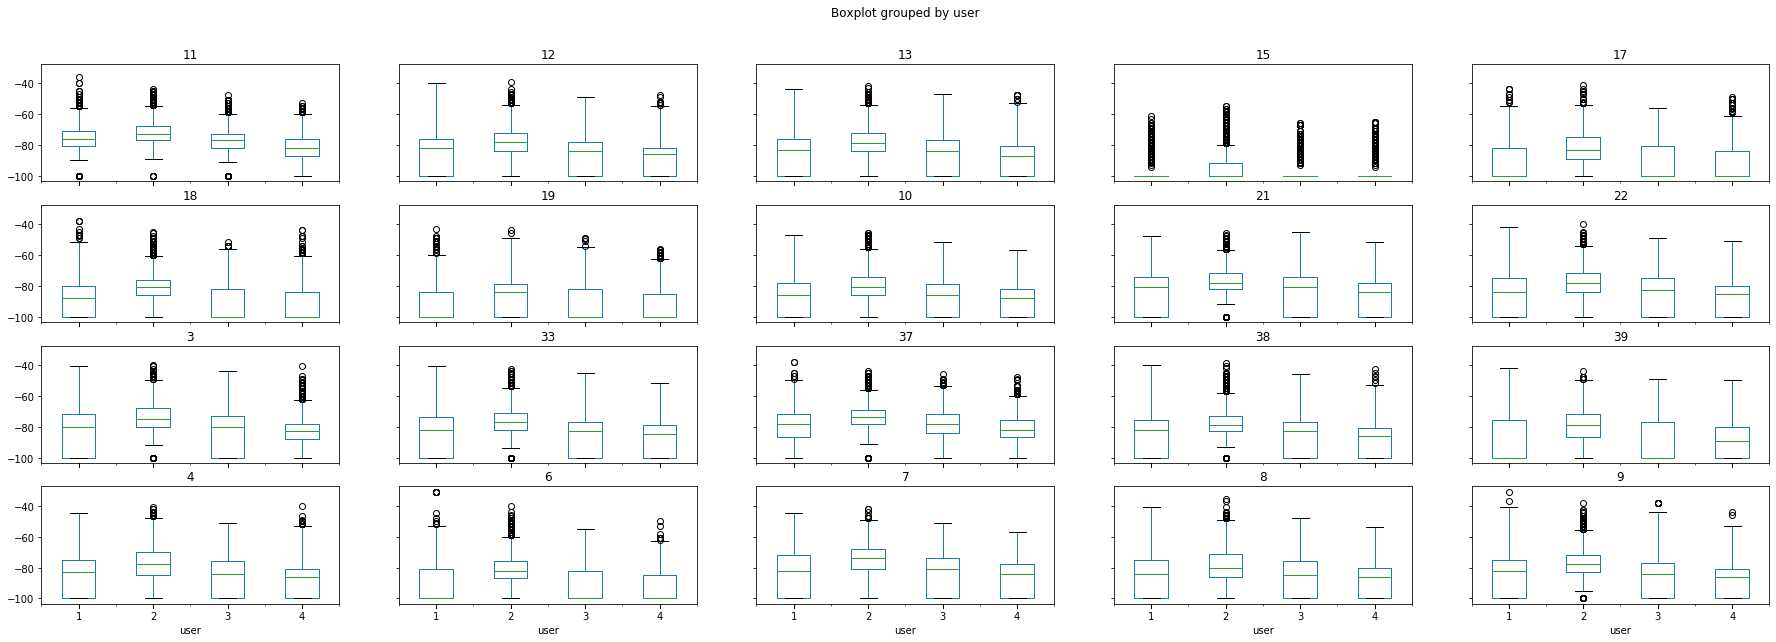

In [72]:
draw_boxplot(tmp_table)


In [84]:
#noramlise things convert to z score
def convert_to_z(df):
  #print(df)
  #return
  df_cp = df.copy()
  for i in ['11', '12', '13', '15', '17','18', '19', '10', '21', '22', '3', '33','37', '38', '39','4', '6', '7', '8', '9']:
    zname = i+' '

    print('before')
    print(df[i].mean())
    print('--------')
    df_cp[i] = df_cp[i].apply(lambda x: x if x >= -90 else np.nan)
    print('after')
    print(df_cp[i].mean())
    print('-------')
    df[zname] = (df_cp[i] - df_cp[i].mean())/df_cp[i].std()
  return df 
tmp_table_z = convert_to_z(tmp_table)

before
-77.57035928143712
--------
after
-74.94528091454063
-------
before
-84.1936751497006
--------
after
-78.51059304007488
-------
before
-84.4937624750499
--------
after
-77.75884359849165
-------
before
-97.87531187624751
--------
after
-82.2065981611682
-------
before
-89.375374251497
--------
after
-79.20325203252033
-------
before
-88.13928393213573
--------
after
-79.45856052344602
-------
before
-90.57098303393214
--------
after
-79.379788548675
-------
before
-86.57478792415169
--------
after
-78.32144661076876
-------
before
-82.39558383233533
--------
after
-76.78588487194268
-------
before
-84.22024700598803
--------
after
-77.05651462838452
-------
before
-80.3438123752495
--------
after
-75.1859237074401
-------
before
-84.06979790419162
--------
after
-75.98803917875306
-------
before
-79.14782934131736
--------
after
-75.19575384158563
-------
before
-83.70353043912175
--------
after
-78.01568296795953
-------
before
-86.65051147704591
--------
after
-76.255643278105

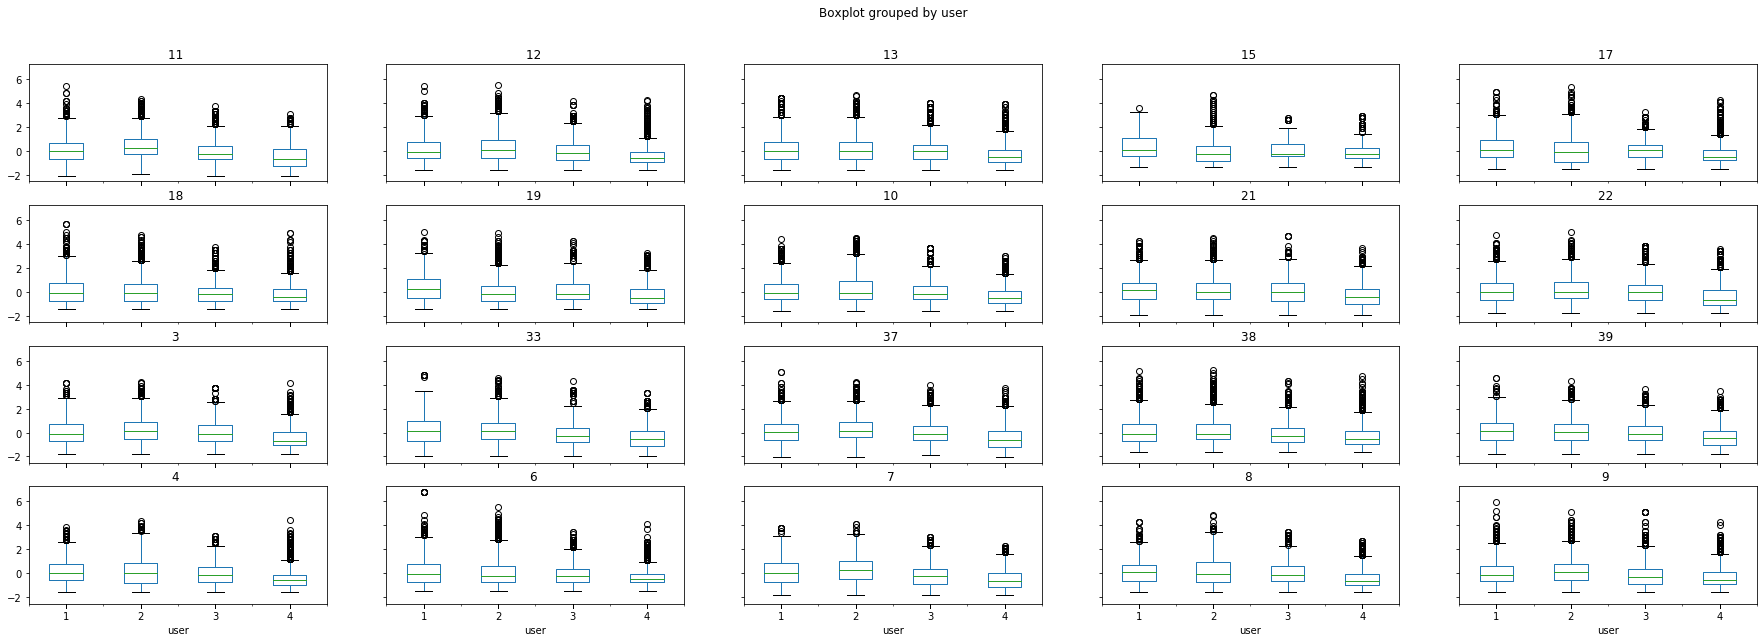

In [87]:
draw_boxplot(tmp_table_z, columnz=True)

In [81]:
import scipy.stats as stats

def anova_test(user1, user2, user3, user4, cols):
  for col in cols:
    print(col)
    data1 = user1[col].dropna() 
    data2 = user2[col].dropna()
    data3 = user3[col].dropna()
    data4 = user4[col].dropna()
    print(stats.f_oneway(data1, data2, data3, data4))
#(7.1210194716424473, 0.00028122423145345439)
anova_test(user_1,user_2,user_3, user_4,['11', '12', '13', '15', '17','18', '19', '10', '21', '22', '3', '33','37', '38', '39','4', '6', '7', '8', '9'])

11
F_onewayResult(statistic=912.8767712682608, pvalue=0.0)
12
F_onewayResult(statistic=841.6511946764724, pvalue=0.0)
13
F_onewayResult(statistic=553.6927853058068, pvalue=0.0)
15
F_onewayResult(statistic=235.8632921588666, pvalue=9.159956605095335e-150)
17
F_onewayResult(statistic=591.4242239187961, pvalue=0.0)
18
F_onewayResult(statistic=860.7736871700558, pvalue=0.0)
19
F_onewayResult(statistic=394.52993868093904, pvalue=2.8644652748557156e-247)
10
F_onewayResult(statistic=475.7793971796442, pvalue=3.5550679577087846e-296)
21
F_onewayResult(statistic=402.2711485097466, pvalue=5.860976719580484e-252)
22
F_onewayResult(statistic=349.5785530458974, pvalue=6.4477873651364515e-220)
3
F_onewayResult(statistic=563.227009493301, pvalue=0.0)
33
F_onewayResult(statistic=590.094567603854, pvalue=0.0)
37
F_onewayResult(statistic=545.1789429589529, pvalue=0.0)
38
F_onewayResult(statistic=583.4878409853263, pvalue=0.0)
39
F_onewayResult(statistic=389.34208447753065, pvalue=4.008436871666431e-244)

In [82]:
user_1, user_2, user_3, user_4 = load_users(tmp_table_z)
anova_test(user_1,user_2,user_3, user_4,['11z', '12z', '13z', '15z', '17z','18z', '19z', '10z', '21z', '22z', '3z', '33z','37z', '38z', '39z','4z', '6z', '7z', '8z', '9z'])

11z
F_onewayResult(statistic=549.5657875136026, pvalue=0.0)
12z
F_onewayResult(statistic=195.77210815538794, pvalue=6.7244498637436e-124)
13z
F_onewayResult(statistic=116.8633980995897, pvalue=1.6337699831624597e-74)
15z
F_onewayResult(statistic=13.030719417190888, pvalue=2.0148135653825066e-08)
17z
F_onewayResult(statistic=100.57579126128213, pvalue=6.380324546431576e-64)
18z
F_onewayResult(statistic=45.64826838397336, pvalue=2.8374908383231906e-29)
19z
F_onewayResult(statistic=89.80080831243448, pvalue=4.6503036476510496e-57)
10z
F_onewayResult(statistic=130.9906529977143, pvalue=3.2352996252229082e-83)
21z
F_onewayResult(statistic=157.0430470514137, pvalue=7.280398429526245e-100)
22z
F_onewayResult(statistic=168.75690198047292, pvalue=5.812349626567441e-107)
3z
F_onewayResult(statistic=293.43353829887656, pvalue=3.5227781514567184e-184)
33z
F_onewayResult(statistic=246.29627077551257, pvalue=1.6328476053011874e-154)
37z
F_onewayResult(statistic=385.53572924786636, pvalue=2.929647821

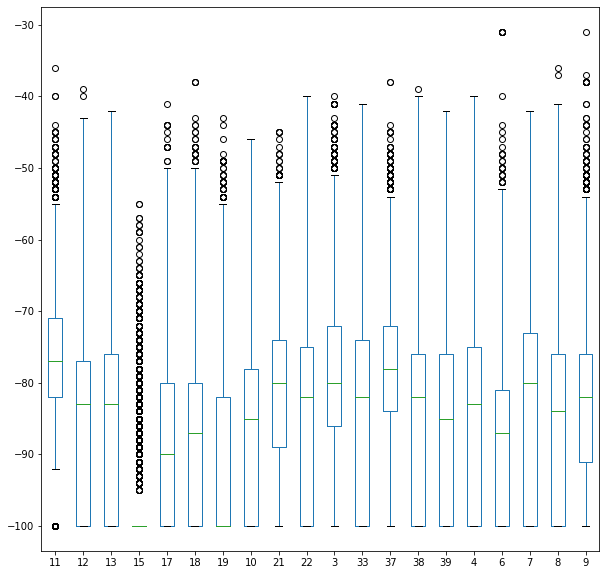

In [0]:
draw_boxplot(tmp_table, False)

Draw service ['11','12','13','15','17','18','19','10','21','22','3','33','37','38','39','4','6','7','8','9']

In [0]:
all_datafram = {}
for ap in ['11', '12', '13', '15']:#, '17', '18', '19', '10', '21', '22', '3', '33','37', '38', '39', '4', '6', '7', '8', '9']:
  datafram = pivot_table_create(tmp_table, ['x','y',ap], ["x"], ["y"] , ap, 'mean')
  all_datafram[ap] = datafram
  draw_heatmap(datafram,title=ap)
  draw_ser(datafram, title=ap)

In [0]:
for ap in [ '17', '18', '19', '10', '21']:#, '22', '3', '33','37', '38', '39', '4', '6', '7', '8', '9']:
  datafram = pivot_table_create(tmp_table, ['x','y',ap], ["x"], ["y"] , ap, 'mean')
  all_datafram[ap] = datafram
  draw_heatmap(datafram,title=ap)
  draw_ser(datafram, title=ap)

In [0]:
for ap in [ '22', '3', '33','37', '38', '39', '4', '6', '7', '8', '9']:
  datafram = pivot_table_create(tmp_table, ['x','y',ap], ["x"], ["y"] , ap, 'mean')
  all_datafram[ap] = datafram
  draw_heatmap(datafram,title=ap)
  draw_ser(datafram, title=ap)

In [0]:
def draw_heatmap(df, ztitle = 'RSS', title='title'):
  #print(df)
  #return
  #fig = go.Figure(data=go.Heatmap(
  #                 z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
  #                 x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
  #                 y=['Morning', 'Afternoon', 'Evening']))
  
  fig = go.Figure(data=[go.Heatmap(z=df.values)])
  fig.update_layout(title=title,scene = dict(xaxis_title='Y',yaxis_title='X',zaxis_title=ztitle),width=700, height=800)
  fig.update_yaxes(dtick=1)
  fig.update_xaxes(dtick=1)
  #fig.update_layout(title='Mt Bruno Elevation', autosize=False,width=500, height=500,margin=dict(l=65, r=50, b=65, t=90))
  fig.show()
draw_heatmap(datafram)

In [0]:
from plotly.tools import FigureFactory as FF
import scipy

In [0]:
data1 = np.random.normal(0, 1, size=50)
data2 = np.random.normal(1,2, size=50)
#print(data1)
#print(data2)
#twosample_results = scipy.stats.ttest_ind(user_1['11'], user_2['11'])
twosample_results = scipy.stats.ttest_ind(data1, data2)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

#twosample_table = FF.create_table(matrix_twosample, index=True)
print(matrix_twosample)
#py.iplot(twosample_table, filename='twosample-table')

[['', 'Test Statistic', 'p-value'], ['Sample Data', -3.305893481983003, 0.0013237585544780726]]


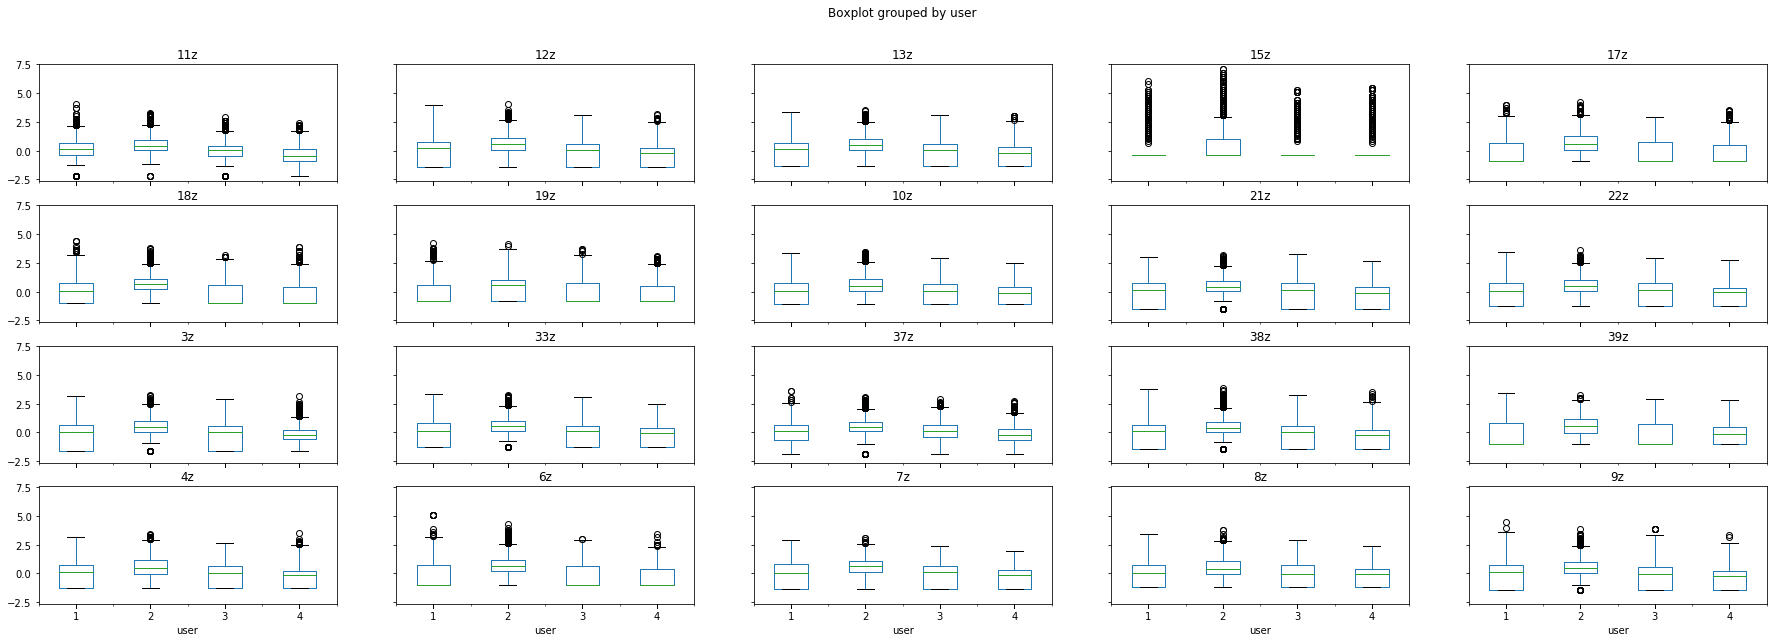

In [0]:
draw_boxplot(tmp_table_z,columnz=True )

In [0]:
def get_correlation(df, col_out):

  for i in ['11', '12', '13', '15', '17','18', '19', '10', '21', '22', '3', '33','37', '38', '39','4', '6', '7', '8', '9']:
    corr = df[i].corr(df[col_out])
    print("correlation {0} is {1}".format(i, corr))
      #df[zname] = (df[i] - df[i].mean())/df[i].std()
get_correlation(tmp_table_z, 'x')
print("=======")
get_correlation(tmp_table_z, 'y')
print("=======")
tmp_table_z['x1'] = tmp_table_z['x'] 
tmp_table_z['y1'] = tmp_table_z['y'] 
tmp_table_group = tmp_table_z.groupby(['x','y']).mean()
#print(tmp_table_group)
get_correlation(tmp_table_group, 'x1')
print("=======")
get_correlation(tmp_table_group, 'y1')
print("=======")

correlation 11 is 0.15420258881050097
correlation 12 is -0.5438811491389982
correlation 13 is 0.2953723789193628
correlation 15 is 0.10788824883566613
correlation 17 is -0.48052014346700656
correlation 18 is -0.4164448597621754
correlation 19 is 0.06924048182263766
correlation 10 is 0.07458299402424869
correlation 21 is 0.5572877471355145
correlation 22 is 0.4378740734602057
correlation 3 is -0.5187580994552367
correlation 33 is 0.11240453791315667
correlation 37 is 0.4706883888464495
correlation 38 is 0.4436751720579314
correlation 39 is 0.4796958740521498
correlation 4 is -0.5338166867729961
correlation 6 is -0.44032337352726203
correlation 7 is -0.4490928300672932
correlation 8 is -0.4999244318318884
correlation 9 is -0.36569238427152506
correlation 11 is 0.33472917004712305
correlation 12 is 0.18154613081738027
correlation 13 is -0.5019287493069581
correlation 15 is -0.14180097182819867
correlation 17 is -0.42053018683470167
correlation 18 is 0.49904250886380475
correlation 19 is 0

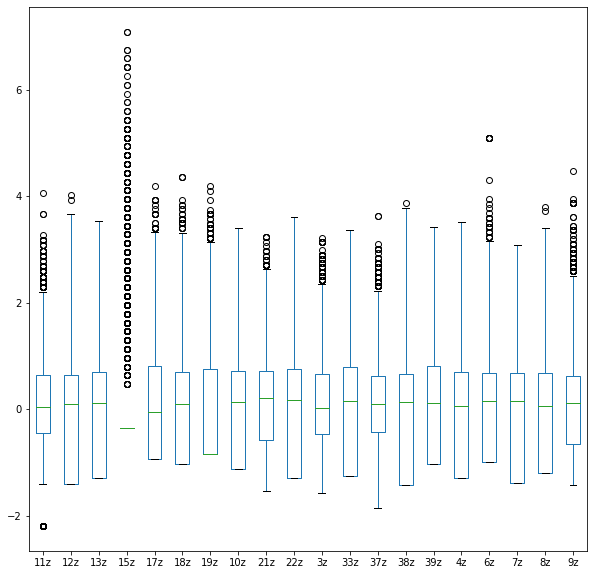

In [0]:
draw_boxplot(tmp_table_z,columnz=True,compare=False )

In [0]:
def get_loc(df):
  for i in ['11', '12', '13', '15', '17','18', '19', '10', '21', '22', '3', '33','37', '38', '39','4', '6', '7', '8', '9']:
    print(df[i].min())
get_loc(tmp_table)